## Module 7 Exercises

The exercises in this notebook focus on the ontologies discussed in [Module-7.ipynb](../Module-7.ipynb). Find the most commonly occuring words in the book. 

**Activity 1: ** Load the book data into a dataframe called book_data. Add a column called "source" to store the filename to which the line of text belongs.

**Hint:**  Read each file data and and create lists of lines and filename and convert this lists into dataframe.

In [1]:
## Your code for activity 1 goes here..
library(foreign)
setwd("/dsa/home/souleymanesaleya/sp17DMIR_souleymanesaleya/datasets/book")
files <-list.files()
data <- 0
names <- 0
for (f in files)
{
tempData = scan(f,what="character",sep="\n",)
data <-c(data,tempData)
source <-replicate(length(tempData),basename(f))
names<-c(names,source)
}
data=as.data.frame(cbind(data,names))


In [2]:
head(data)


data,names
0,0
FIRST CHRONICLES,1chron.txt
"1:1: Adam, Sheth, Enosh,",1chron.txt
"1:2: Kenan, Mahalaleel, Jered,",1chron.txt
"1:3: Henoch, Methuselah, Lamech,",1chron.txt
"1:4: Noah, Shem, Ham, and Japheth.",1chron.txt


**Activity 2: ** Rename the two columns of book_data dataframe as "line" and "source"

In [3]:
## Your code for activity 2 goes here..
library(plyr)
data <- rename(data,c('data'='line','names'='source'))
head(data)

line,source
0,0
FIRST CHRONICLES,1chron.txt
"1:1: Adam, Sheth, Enosh,",1chron.txt
"1:2: Kenan, Mahalaleel, Jered,",1chron.txt
"1:3: Henoch, Methuselah, Lamech,",1chron.txt
"1:4: Noah, Shem, Ham, and Japheth.",1chron.txt


**Activity 3: ** Remove the chapter and line numbers in front of each line of text including special characters (for example, 1:1: or 1:2: etc).

In [4]:
## Your code for activity 3 goes here..
data$line<-sub('([1-9][:][1-9][:])','', data$line)
head(data)

line,source
0,0
FIRST CHRONICLES,1chron.txt
"Adam, Sheth, Enosh,",1chron.txt
"Kenan, Mahalaleel, Jered,",1chron.txt
"Henoch, Methuselah, Lamech,",1chron.txt
"Noah, Shem, Ham, and Japheth.",1chron.txt


**Activity 4: ** create a new dataframe called book_words to count the occurance of each word in the books and also total words in the book.

In [5]:
library(dplyr)
library(janeaustenr)
library(tidytext)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
data$line<-as.character(data$line)
data$source<-as.character(data$source)
 

In [7]:
## Your code for activity 4 goes here..
book_words <- data %>% 
unnest_tokens(word,line) %>%
count(source,word,sort = TRUE) %>%
ungroup()
head(book_words)


source,word,n
jeremiah.txt,the,3839
genesis.txt,and,3678
ezekiel.txt,the,3609
numbers.txt,the,3501
exodus.txt,the,3114
isaiah.txt,the,3017


In [8]:
total_words<-book_words %>% 
  group_by(source) %>% 
  summarize(total = sum(n))
head(total_words)

source,total
0,1
1chron.txt,22001
1corinth.txt,10122
1john.txt,2639
1kings.txt,25936
1peter.txt,2598


In [9]:
book_words <- left_join(book_words, total_words)

head(book_words)

Joining, by = "source"


source,word,n,total
jeremiah.txt,the,3839,44922
genesis.txt,and,3678,40894
ezekiel.txt,the,3609,41513
numbers.txt,the,3501,35135
exodus.txt,the,3114,34719
isaiah.txt,the,3017,39027


**Activity 5: ** Use the bind_tf_idf() function to find tf-idf scores of each word occuring in the books. 

In [10]:
## Your code for activity 5 goes here..
book_words <- book_words %>%
  bind_tf_idf(word, source, n)
head(book_words)


source,word,n,total,tf,idf,tf_idf
jeremiah.txt,the,3839,44922,0.08545924,0.01503788,0.001285126
genesis.txt,and,3678,40894,0.08993984,0.01503788,0.001352504
ezekiel.txt,the,3609,41513,0.08693662,0.01503788,0.001307342
numbers.txt,the,3501,35135,0.09964423,0.01503788,0.001498438
exodus.txt,the,3114,34719,0.08969152,0.01503788,0.001348770
isaiah.txt,the,3017,39027,0.07730546,0.01503788,0.001162510


**Activity 6: ** Plot the top 20 words occured in the whole dataset. 

In [11]:
Arranged_words<-book_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))
head(Arranged_words)

source,word,n,tf,idf,tf_idf
0,0,1,1.000000000,4.204693,4.20469262
jonah.txt,jonah,19,0.014126394,3.511545,0.04960547
esther.txt,esther,54,0.009305532,4.204693,0.03912690
esther.txt,haman,50,0.008616233,4.204693,0.03622861
ruth.txt,naomi,20,0.007485030,4.204693,0.03147225
haggai.txt,haggai,10,0.008539710,3.511545,0.02998758


Selecting by tf_idf


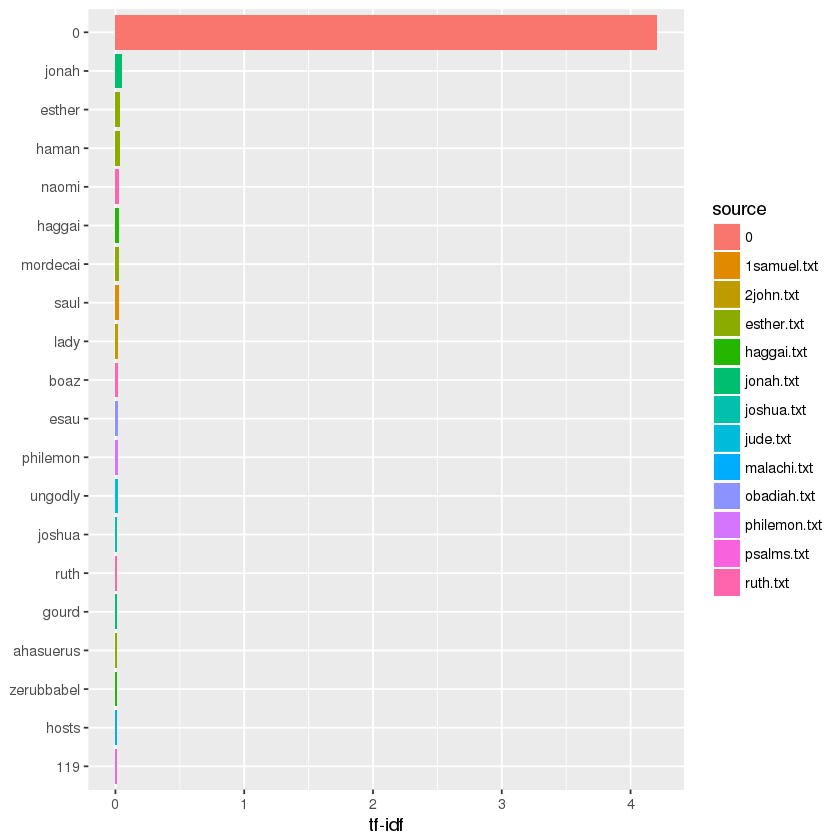

In [14]:

plot_words<-book_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word))))

plot_words  %>% 
  top_n(20) %>%
  ggplot(aes(word, tf_idf, fill = source)) +
  geom_col() +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()